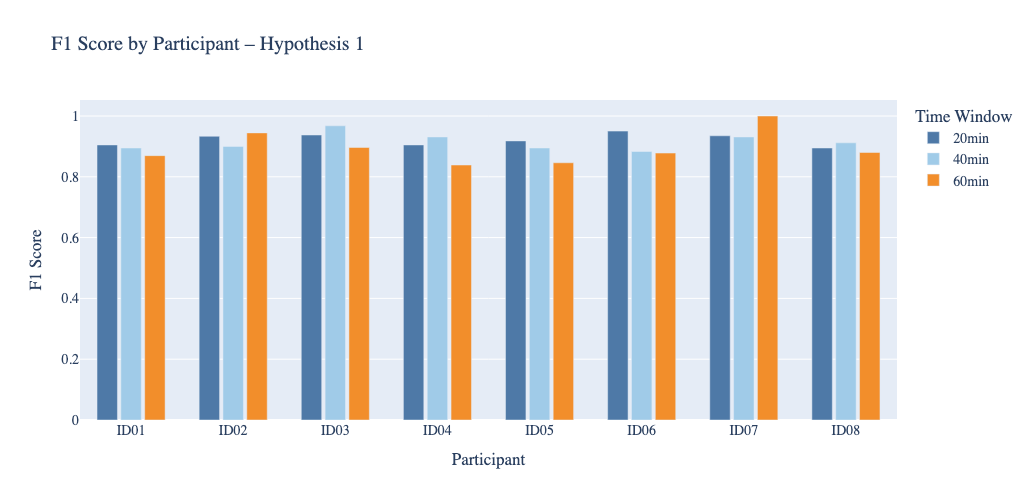

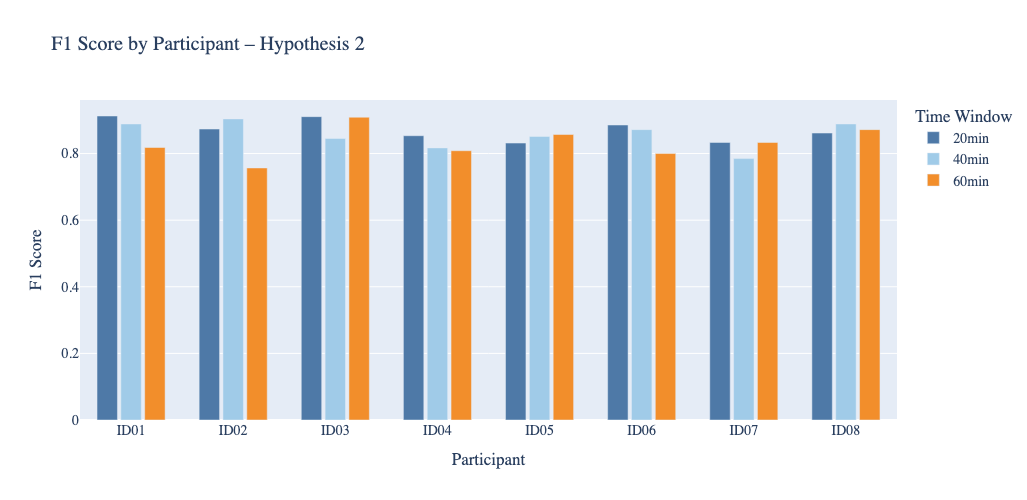

Hypothesis      H1                   H2              
TimeWindow   20min  40min  60min  20min  40min  60min
Participant                                          
ID01         0.905  0.895  0.870  0.913  0.889  0.818
ID02         0.933  0.900  0.944  0.874  0.904  0.757
ID03         0.938  0.968  0.897  0.911  0.845  0.909
ID04         0.905  0.931  0.839  0.854  0.817  0.809
ID05         0.918  0.895  0.846  0.831  0.851  0.857
ID06         0.950  0.883  0.878  0.886  0.872  0.800
ID07         0.935  0.931  1.000  0.833  0.785  0.833
ID08         0.895  0.912  0.880  0.862  0.889  0.872


In [2]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_excel("Confusion_data.xlsx")

def compute_f1(tp, fp, fn):
    denom = 2 * tp + fp + fn
    return 2 * tp / denom if denom else 0.0

df["F1"] = df.apply(lambda r: compute_f1(r["TP"], r["FP"], r["FN"]), axis=1)

time_colors = {
    "20min": "#4E79A7",  # Steel Blue
    "40min": "#A0CBE8",  # Sky Blue
    "60min": "#F28E2B"   # Pumpkin
}

hypothesis_labels = {
    "H1": "Hypothesis 1",
    "H2": "Hypothesis 2"
}

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]
    participants = df_h["Participant"].unique()

    fig = go.Figure()

    for time_window in ["20min", "40min", "60min"]:
        y_vals = []
        for pid in participants:
            row = df_h[(df_h["Participant"] == pid) & (df_h["TimeWindow"] == time_window)]
            y_vals.append(row["F1"].values[0] if not row.empty else None)

        fig.add_trace(go.Bar(
            x=participants,
            y=y_vals,
            name=time_window,
            marker_color=time_colors[time_window],
            width=0.2
        ))

    fig.update_layout(
        title=f"F1 Score by Participant – {hypothesis_labels.get(hypothesis, hypothesis)}",
        xaxis_title="Participant",
        yaxis_title="F1 Score",
        barmode='group',
        bargap=0.3,
        font=dict(family="Segoe UI", size=14),
        legend_title_text="Time Window",
        height=500
    )

    fig.show()

f1_summary = df.pivot_table(
    index="Participant",
    columns=["Hypothesis", "TimeWindow"],
    values="F1"
).round(3)

print(f1_summary)
f1_summary.to_excel("F1_Score_Summary.xlsx")

In [9]:
import pandas as pd

# Loop through each hypothesis
for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]

    # Pivot table with row and column averages
    f1_table = pd.pivot_table(
        df_h,
        index="Participant",
        columns="TimeWindow",
        values="F1",
        aggfunc="mean",
        margins=True,
        margins_name="Average"
    ).round(3)

    print(f"\n=== F1 Score Summary for {hypothesis_labels.get(hypothesis, hypothesis)} ===")
    print(f1_table.to_string())



=== F1 Score Summary for Hypothesis 1 ===
TimeWindow   20min  40min  60min  Average
Participant                              
ID01         0.905  0.895  0.870    0.890
ID02         0.933  0.900  0.944    0.926
ID03         0.938  0.968  0.897    0.934
ID04         0.905  0.931  0.839    0.892
ID05         0.918  0.895  0.846    0.886
ID06         0.950  0.883  0.878    0.904
ID07         0.935  0.931  1.000    0.955
ID08         0.895  0.912  0.880    0.896
Average      0.922  0.914  0.894    0.910

=== F1 Score Summary for Hypothesis 2 ===
TimeWindow   20min  40min  60min  Average
Participant                              
ID01         0.913  0.889  0.818    0.873
ID02         0.874  0.904  0.757    0.845
ID03         0.911  0.845  0.909    0.888
ID04         0.854  0.817  0.809    0.826
ID05         0.831  0.851  0.857    0.847
ID06         0.886  0.872  0.800    0.853
ID07         0.833  0.785  0.833    0.817
ID08         0.862  0.889  0.872    0.874
Average      0.870  0.856  0.832

In [2]:
import pandas as pd
import plotly.graph_objects as go
import os
from PIL import Image
import cairosvg

df = pd.read_excel("Confusion_data.xlsx")

def compute_f1(tp, fp, fn):
    denom = 2 * tp + fp + fn
    return 2 * tp / denom if denom else 0.0

df["F1"] = df.apply(lambda r: compute_f1(r["TP"], r["FP"], r["FN"]), axis=1)

time_colors = {
    "20min": "#4E79A7",  # Steel Blue
    "40min": "#A0CBE8",  # Sky Blue
    "60min": "#F28E2B"   # Pumpkin
}

hypothesis_labels = {
    "H1": "Hypothesis 1",
    "H2": "Hypothesis 2"
}

# Output directory for images
os.makedirs("figures", exist_ok=True)

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]
    participants = df_h["Participant"].unique()

    fig = go.Figure()

    for time_window in ["20min", "40min", "60min"]:
        y_vals = []
        for pid in participants:
            row = df_h[(df_h["Participant"] == pid) & (df_h["TimeWindow"] == time_window)]
            y_vals.append(row["F1"].values[0] if not row.empty else None)

        fig.add_trace(go.Bar(
            x=participants,
            y=y_vals,
            name=time_window,
            marker_color=time_colors[time_window],
            width=0.2
        ))

    fig.update_layout(
        title=f"F1 Score by Participant – {hypothesis_labels.get(hypothesis, hypothesis)}",
        xaxis_title="Participant",
        yaxis_title="F1 Score",
        barmode='group',
        bargap=0.3,
        font=dict(family="Segoe UI", size=14),
        legend_title_text="Time Window",
        height=500,
        width=1000
    )

    # Save as SVG
    svg_path = f"figures/F1_{hypothesis}.svg"
    fig.write_image(svg_path, format="svg", width=1000, height=500)

    # Convert SVG to PNG at 300 DPI
    png_path = f"figures/F1_{hypothesis}_temp.png"
    cairosvg.svg2png(url=svg_path, write_to=png_path, dpi=300)

    # Convert PNG to compressed TIFF
    tiff_path = f"figures/F1_{hypothesis}_final.tiff"
    img = Image.open(png_path)
    img.save(tiff_path, dpi=(300, 300), compression="tiff_deflate")

    # Cleanup intermediate files
    os.remove(svg_path)
    os.remove(png_path)

    print(f"✅ Saved: {tiff_path}")

# Optional: Save F1 summary as Excel
f1_summary = df.pivot_table(
    index="Participant",
    columns=["Hypothesis", "TimeWindow"],
    values="F1"
).round(3)

print(f1_summary)
f1_summary.to_excel("F1_Score_Summary.xlsx")


✅ Saved: figures/F1_H1_final.tiff
✅ Saved: figures/F1_H2_final.tiff
Hypothesis      H1                   H2              
TimeWindow   20min  40min  60min  20min  40min  60min
Participant                                          
ID01         0.905  0.895  0.870  0.913  0.889  0.818
ID02         0.933  0.900  0.944  0.874  0.904  0.757
ID03         0.938  0.968  0.897  0.911  0.845  0.909
ID04         0.905  0.931  0.839  0.854  0.817  0.809
ID05         0.918  0.895  0.846  0.831  0.851  0.857
ID06         0.950  0.883  0.878  0.886  0.872  0.800
ID07         0.935  0.931  1.000  0.833  0.785  0.833
ID08         0.895  0.912  0.880  0.862  0.889  0.872


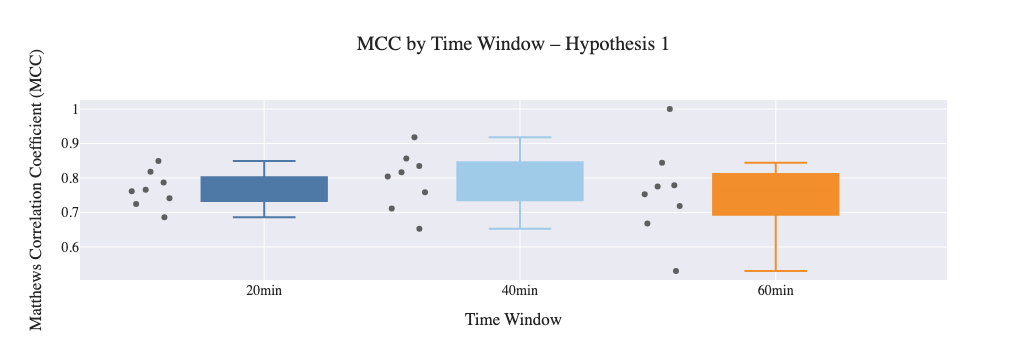

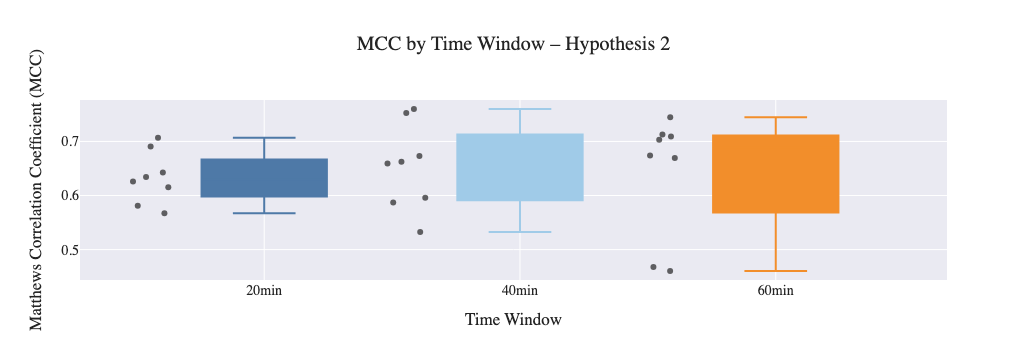

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from math import sqrt

# --- Load data from Excel ---
df = pd.read_excel("Confusion_data.xlsx")

# --- Compute MCC ---
def compute_mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator else 0.0

df["MCC"] = df.apply(lambda r: compute_mcc(r["TP"], r["TN"], r["FP"], r["FN"]), axis=1)

# --- Define Plot Colors for Time Windows ---
time_colors = {
    "20min": "#4E79A7",  # Steel Blue
    "40min": "#A0CBE8",  # Sky Blue
    "60min": "#F28E2B"   # Pumpkin
}

# --- Plot MCC for Each Hypothesis Separately ---
for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]

    fig = go.Figure()

    for time_window in ["20min", "40min", "60min"]:
        y_vals = df_h[df_h["TimeWindow"] == time_window]["MCC"]

        fig.add_trace(go.Box(
            y=y_vals,
            name=time_window,
            boxpoints='all',
            jitter=0.4,
            pointpos=-1.8,
            marker=dict(color='black', opacity=0.6),
            fillcolor=time_colors[time_window],
            line=dict(color=time_colors[time_window]),
            showlegend=False
        ))

    fig.update_layout(
        title=f"MCC by Time Window – {'Hypothesis 1' if hypothesis == 'H1' else 'Hypothesis 2'}",
        yaxis_title="Matthews Correlation Coefficient (MCC)",
        xaxis_title="Time Window",
        font=dict(family="Segoe UI", size=14),
        height=500,
        template="seaborn",
        yaxis=dict(range=[0, 1])
    )

    fig.show()


In [5]:
import pandas as pd
import plotly.graph_objects as go
import os
from PIL import Image
import cairosvg

# Load data
df = pd.read_excel("Confusion_data.xlsx")

# Compute F1 score
def compute_f1(tp, fp, fn):
    denom = 2 * tp + fp + fn
    return 2 * tp / denom if denom else 0.0

df["F1"] = df.apply(lambda r: compute_f1(r["TP"], r["FP"], r["FN"]), axis=1)

# Colors and labels
time_colors = {"20min":"#4E79A7","40min":"#A0CBE8","60min":"#F28E2B"}
hypothesis_labels = {"H1":"Hypothesis 1","H2":"Hypothesis 2"}

os.makedirs("figures", exist_ok=True)

# **4 × 3 inches @ 300 DPI → 1200 × 600 px**
export_width, export_height = 1200, 600

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"]==hypothesis]
    participants = df_h["Participant"].unique()

    fig = go.Figure()
    for window in ["20min","40min","60min"]:
        y = [ df_h.loc[(df_h.Participant==p)&(df_h.TimeWindow==window),"F1"].iat[0]
              if not df_h[(df_h.Participant==p)&(df_h.TimeWindow==window)].empty else None
              for p in participants ]
        fig.add_trace(go.Bar(
            x=participants, y=y,
            name=window,
            marker_color=time_colors[window],
            width=0.2
        ))

    fig.update_layout(
        title=f"F1 Score by Participant – {hypothesis_labels[hypothesis]}",
        title_font=dict(family="Arial", size=14),
        xaxis_title="Participant",
        yaxis_title="F1 Score",
        font=dict(family="Arial", size=12),
        legend_title_text="Time Window",
        width=export_width,
        height=export_height,
        barmode='group',
        bargap=0.3,
        margin=dict(l=80, r=20, t=80, b=80)
    )

    # Export SVG at the target pixel size
    svg = f"figures/F1_{hypothesis}.svg"
    fig.write_image(svg, format="svg", width=export_width, height=export_height)

    # Rasterize to PNG at 300 DPI
    png = f"figures/F1_{hypothesis}_temp.png"
    cairosvg.svg2png(url=svg, write_to=png, dpi=300)

    # Compress to TIFF
    tiff = f"figures/F1_{hypothesis}_final.tiff"
    img = Image.open(png)
    img.save(tiff, dpi=(300,300), compression="tiff_deflate")

    # Clean up
    os.remove(svg)
    os.remove(png)

    print(f"✅ Saved smaller, crisp TIFF: {tiff}")


✅ Saved smaller, crisp TIFF: figures/F1_H1_final.tiff
✅ Saved smaller, crisp TIFF: figures/F1_H2_final.tiff


In [10]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from math import sqrt
import os
from PIL import Image
import cairosvg

# Load and compute MCC
df = pd.read_excel("Confusion_data.xlsx")

def compute_mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator else 0.0

df["MCC"] = df.apply(lambda r: compute_mcc(r["TP"], r["TN"], r["FP"], r["FN"]), axis=1)

# Colors and fonts
time_colors = {
    "20min": "#4E79A7",
    "40min": "#A0CBE8",
    "60min": "#F28E2B"
}
font_family = "Arial"
font_size = 20  # ~10pt at 300 DPI

# Output folder and resolution
os.makedirs("figures", exist_ok=True)
dpi = 300
inch_width = 6
inch_height = 3
export_width = inch_width * dpi
export_height = inch_height * dpi

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]
    fig = go.Figure()

    for time_window in ["20min", "40min", "60min"]:
        y_vals = df_h[df_h["TimeWindow"] == time_window]["MCC"]

        fig.add_trace(go.Box(
            y=y_vals,
            name=time_window,
            boxpoints='all',
            jitter=0.4,
            pointpos=-1.8,
            marker=dict(color='black', opacity=0.6),
            fillcolor=time_colors[time_window],
            line=dict(color=time_colors[time_window]),
            showlegend=False
        ))

    # Minimized margin
    fig.update_layout(
        title=f"MCC by Time Window – {'Hypothesis 1' if hypothesis == 'H1' else 'Hypothesis 2'}",
        xaxis_title="Time Window",
        yaxis_title="Matthews Correlation Coefficient (MCC)",
        font=dict(family=font_family, size=font_size),
        yaxis=dict(range=[0, 1]),
        width=export_width,
        height=export_height,
        margin=dict(l=30, r=30, t=50, b=40),
        template="seaborn"
    )

    # File paths
    svg_path = f"figures/MCC_{hypothesis}.svg"
    png_path = f"figures/MCC_{hypothesis}_temp.png"
    tiff_path = f"figures/MCC_{hypothesis}_final.tiff"

    # Export SVG → PNG → TIFF
    fig.write_image(svg_path, format="svg", width=export_width, height=export_height)
    cairosvg.svg2png(url=svg_path, write_to=png_path, dpi=dpi)
    img = Image.open(png_path)
    img.save(tiff_path, dpi=(dpi, dpi), compression="tiff_deflate")

    os.remove(svg_path)
    os.remove(png_path)

    print(f"✅ Saved autoscaled TIFF: {tiff_path}")


✅ Saved autoscaled TIFF: figures/MCC_H1_final.tiff
✅ Saved autoscaled TIFF: figures/MCC_H2_final.tiff


In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from math import sqrt
import os
from PIL import Image
import cairosvg

# Load and compute MCC
df = pd.read_excel("Confusion_data.xlsx")

def compute_mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator else 0.0

df["MCC"] = df.apply(lambda r: compute_mcc(r["TP"], r["TN"], r["FP"], r["FN"]), axis=1)

# Settings
font_family = "Arial"
font_size = 20
dpi = 300
inch_width = 6
inch_height = 3
export_width = inch_width * dpi
export_height = inch_height * dpi
os.makedirs("figures", exist_ok=True)

# Plot: x = TimeWindow, y = MCC, one line per Participant
time_order = ["20min", "40min", "60min"]

for hypothesis in df["Hypothesis"].unique():
    df_h = df[df["Hypothesis"] == hypothesis]
    fig = go.Figure()

    for pid in df_h["Participant"].unique():
        df_p = df_h[df_h["Participant"] == pid]
        df_p = df_p.set_index("TimeWindow").reindex(time_order).reset_index()

        fig.add_trace(go.Scatter(
            x=df_p["TimeWindow"],
            y=df_p["MCC"],
            mode="lines+markers",
            name=f"Participant {pid}",
            showlegend=False
        ))

    fig.update_layout(
        title=f"MCC over Time – {'Hypothesis 1' if hypothesis == 'H1' else 'Hypothesis 2'}",
        xaxis_title="Time Window",
        yaxis_title="Matthews Correlation Coefficient (MCC)",
        font=dict(family=font_family, size=font_size),
        yaxis=dict(range=[0, 1]),
        width=export_width,
        height=export_height,
        margin=dict(l=40, r=40, t=50, b=40),
        template="simple_white"
    )

    # Save
    fname_prefix = f"MCC_{hypothesis}_by_time"
    svg_path = f"figures/{fname_prefix}.svg"
    png_path = f"figures/{fname_prefix}_temp.png"
    tiff_path = f"figures/{fname_prefix}_final.tiff"

    fig.write_image(svg_path, format="svg", width=export_width, height=export_height)
    cairosvg.svg2png(url=svg_path, write_to=png_path, dpi=dpi)
    img = Image.open(png_path)
    img.save(tiff_path, dpi=(dpi, dpi), compression="tiff_deflate")

    os.remove(svg_path)
    os.remove(png_path)

    print(f"✅ Saved: {tiff_path}")


✅ Saved: figures/MCC_H1_by_time_final.tiff
✅ Saved: figures/MCC_H2_by_time_final.tiff
